# Chaîne de masse-ressort

## LU2PY222 - CC - 28 février 2024 - Ralph Salibi 

## Modèle
On considère une chaîne de $N+2$ masses $m$ numérotées de $0$ à $N+1$ et reliées entre elles par des ressorts de raideur $k$. Les masses $0$ et $N+1$ sont maintenues fixes et on applique une force $F \cos(\omega t)$, qui varie sinusoidalement en fonction du temps $t$, sur la masse $N$.

Après un régime transitoire, le déplacement de la masse $n$ par rapport à sa position d'équilibre est: $A_n \cos(\omega t)$ où $A_n$ est un réel positif ou négatif. Ainsi, les déplacements des masses sont synchronisées, mais chaque déplacement a une amplitude $A_n$ différente. Ce deplacement peut même s'inverser (en opposition de phase) lorsque l'amplitude $A_n$ est négative.

Les amplitudes $A_n$ des déplacements de chaque masse vérifient la relation de récurrence: $A_0=0$, $A_{N+1}=0$, $-m\omega^2 A_n=k(A_{n+1}+A_{n-1}-2A_n)$ pour $n$ de 1 à $N-1$ et $-m\omega^2 A_N=k(A_{N-1}-2A_N)+F$.

Pour résoudre le problème numériquement, on utilise $\sqrt{k/m}$ comme unité pour les pulsations, $F/k$ comme unité pour les amplitudes et on pose $A_n = A u_n$ et $u_1=1$. On en déduit que la suite d'éléments $u_n$ a pour relation de récurrence

$$u_0=0 \ \ \ , \ \ \ u_1=1 \ \ \ , \ \ \ u_n=(2-\omega^2)u_{n-1}-u_{n-2} \ \ \ $$


avec le facteur $A$ donné par $$A=\frac{1}{(2-\omega^2)u_N-u_{N-1}} \ \ \ .$$

### Partie I
Dans cette partie, on cherche à démontrer le rapport entre la force F et oméga

In [1]:
import numpy as np
import matplotlib.pyplot as plt

1.9995789043750607
2.99954930580473


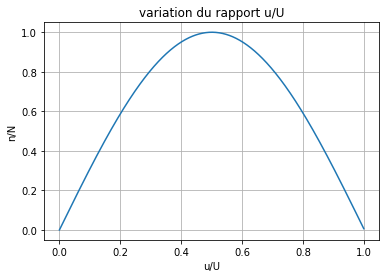

In [2]:
N = 1000
w = np.pi/N

n = np.arange(1,N)

u = np.empty(len(n))

u[0] = 0
u[1] = 1

for i in range(2,len(n)):
    u[i] = (2- w**2)*u[i - 1] - u[i - 2]
    
U = max(u)
print(u[998])
print(u[997])
plt.plot(n/N,u/U)

plt.title('variation du rapport u/U')
plt.ylabel('n/N')
plt.xlabel('u/U')
plt.grid()
plt.show()

Etant donné que le rapport à pour maximum 1 alors les conditions aux limites sont respectés.

2) Ensuite, représentez les valeurs du facteur $|A|$ en fonction du paramètre $N \omega / \pi$, pour $N=1000$ et $\omega=[0, 20/N]$. Utilisez une échelle logarithmique pour l'échelle des ordonnées et 10000 valeurs de $\omega$. Vous devez obtenir un graphique similaire à celui ci-dessous. Que pouvez-vous en déduire visuellement sur les valeurs des pulsations de résonance? Vérifiez votre observation graphiquement. Que se passe-t-il quand on change le nombre de valeurs de $\omega$ et pourquoi?

/tmp/ipykernel_4343/1138983454.py:18: RuntimeWarning: overflow encountered in scalar divide
  A1[k] = np.abs(1/((2- w_val**2)*U_N - U_N1))


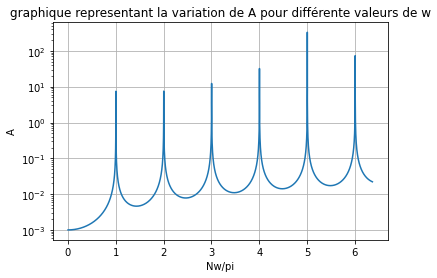

In [3]:
w1 = np.linspace(0, 20/N, 10000)

U_N = np.empty(10000)
U_N1 = np.empty(10000)

A1 = np.empty(10000)

u1 = np.empty(len(n))

u1[0] = 0
u1[1] = 1

for k,w_val in enumerate(w1):
    for i in range(2,len(n)):
        u1[i] = (2- w_val**2)*u1[i - 1] - u1[i - 2]
        U_N = (2- w_val**2)*u1[998 - 1] - u1[998 - 2]
        U_N1 = (2- w_val**2)*u1[997 - 1] - u1[997 - 2]
        A1[k] = np.abs(1/((2- w_val**2)*U_N - U_N1))
                  
plt.semilogy(N*w1/np.pi, A1)
plt.ylabel('A')
plt.xlabel('Nw/pi')
plt.title('graphique representant la variation de A pour différente valeurs de w')
plt.grid()
plt.show()





3) Représentez sur un même graphique les valeurs des éléments de la suite $u_n/U$ en fonction de $n/N$ pour les 4 premières valeurs des pulsations de résonance. Que pouvez-vous observer? Montrer graphiquement que les valeurs des éléments de la suite peuvent être représentés par un modèle sinusoïdal qui correspond à la pulsation de résonance, c'est-à-dire $v_n=\sin(\omega_r n)$.


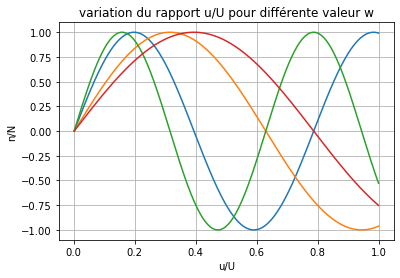

In [4]:
N = 1000

w11= 0.008
w22= 0.005
w33= 0.01
w44= 0.004

n = np.arange(1,N)

u1 = np.empty(len(n))

u1[0] = 0
u1[1] = 1

u2 = np.empty(len(n))

u2[0] = 0
u2[1] = 1

u3 = np.empty(len(n))

u3[0] = 0
u3[1] = 1

u4 = np.empty(len(n))

u4[0] = 0
u4[1] = 1


for i in range(2,len(n)):
    u1[i] = (2- w11**2)*u1[i - 1] - u1[i - 2]
    u2[i] = (2- w22**2)*u2[i - 1] - u2[i - 2]
    u3[i] = (2- w33**2)*u3[i - 1] - u3[i - 2]
    u4[i] = (2- w44**2)*u4[i - 1] - u4[i - 2]
    
U1 = max(u1)
U2 = max(u2)
U3 = max(u3)
U4 = max(u4)

plt.plot(n/N,u1/U1)
plt.plot(n/N,u2/U2)
plt.plot(n/N,u3/U3)
plt.plot(n/N,u4/U4)

plt.title('variation du rapport u/U pour différente valeur w')
plt.ylabel('n/N')
plt.xlabel('u/U')
plt.grid()
plt.show()

On remarque que la suite osscille, nous pourrons alors représenter les valeurs de la suite par une fonction sinusoïdale.

Apres avoir fait varier dans la question précédente,lorsque N varie, les oscillations observés diminue si N diminue et augmente si N augmente.

### Partie II

Les masses de $0$ à $N/2$ valent maintenant $m'=rm$. La suite d'éléments $u_n$ est donnée par $$u_0=0 \ \ \ , \ \ \ u_1=1 \ \ \ , \ \ \ u_n=(2-r\omega^2)u_{n-1}-u_{n-2} \ \ \ \mathrm{pour} \ \ \ n\le N/2 \ \ \ ,$$ $$u_n=(2-\omega^2)u_{n-1}-u_{n-2} \ \ \ \mathrm{pour} \ \ \ n > N/2 \ \ \ .$$
Le facteur $A$ est toujours donné par la même expression. On utilisera $N=1000$ pour toute cette partie.

5) Représentez sur un même graphique l'amplitude $|A|$ en fonction du paramètre $N \omega / \pi$ pour $\omega=[0,4/N]$, et $r=1,2,3,4,5$. On utilisera 10000 valeurs de la pulsation $\omega$ et une échelle logarithmique pour l'axe des ordonnées. Que pouvez-vous constater qualitativement en comparant les pulsations de résonance pour les différentes valeurs de $r$?

6) Trouver numériquement la valeur de la première pulsation de résonance $\omega_1$ pour $r=1,2,3,4,5$. Pour cela, vous pourrez utiliser la fonction ```find_peaks()``` du module ```scipy.signal``` (voir en annexe comment utiliser cette fonction). Votre observation qualitative de la question précédente est-elle vérifiée?

7) Comparer sur un même graphique les valeurs des éléments de la suite $u_n/U$ en fonction de $n/N$, pour la première pulsation de résonance $\omega=\omega_1$ et pour les différentes valeurs de $r$ considérées. Que constatez-vous?

8) Représentez graphiquement $\omega_1$ en fonction de $r$ pour $r$ variant de $1$ à $100$, en utilisant des échelles logarithmiques pour les deux axes. On peut montrer que $\omega_1 \simeq (4.06/N\sqrt{r})$ pour $N$ et $r$ assez grands. Vérifiez vous cette relation?

## Annexe
### Utilisation de ```find_peak()```

[0.49994999] [0.9999975]


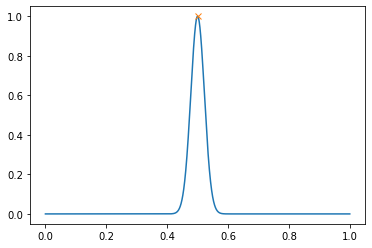

In [5]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,1,10000)
y = np.exp(-(x-0.5)**2/1e-3)

peaks, _ = find_peaks(y)

plt.plot(x, y)
plt.plot(x[peaks], y[peaks], "x")
print(x[peaks], y[peaks])